In [1]:
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import numpy as np
import sklearn.preprocessing
import dash
import seaborn as sns


for this assignment i took the help of:
https://www.geeksforgeeks.org/ordinary-least-squares-ols-using-statsmodels/

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#:~:text=Returns%20predicted%20values.,y_true%20%2D%20y_pred)**%202).

https://www.geeksforgeeks.org/ml-implementing-l1-and-l2-regularization-using-sklearn/


In [2]:
df = pd.read_csv("Life Expectancy Data.csv")
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [4]:
df.shape

(2938, 22)

In [5]:
nu = df.isnull().sum()
print(nu)

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64


In [6]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
df.reset_index()
nu = df.isnull().sum()
print(nu)
print(df.shape)

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64
(1649, 22)


In [7]:
print(df.shape)

(1649, 22)


In [8]:
df.corr().head()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.050771,-0.037092,0.008029,-0.113365,0.069553,0.114897,-0.053822,0.005739,0.010479,-0.016699,0.059493,0.029641,-0.123405,0.096421,0.012567,0.019757,0.014122,0.122892,0.088732
Life expectancy,0.050771,1.000000,-0.702523,-0.169074,0.402718,0.409631,0.199935,-0.068881,0.542042,-0.192265,0.327294,0.174718,0.341331,-0.592236,0.441322,-0.022305,-0.457838,-0.457508,0.721083,0.727630
Adult Mortality,-0.037092,-0.702523,1.000000,0.042450,-0.175535,-0.237610,-0.105225,-0.003967,-0.351542,0.060365,-0.199853,-0.085227,-0.191429,0.550691,-0.255035,-0.015012,0.272230,0.286723,-0.442203,-0.421171
infant deaths,0.008029,-0.169074,0.042450,1.000000,-0.106217,-0.090765,-0.231769,0.532680,-0.234425,0.996906,-0.156929,-0.146951,-0.161871,0.007712,-0.098092,0.671758,0.463415,0.461908,-0.134754,-0.214372
Alcohol,-0.113365,0.402718,-0.175535,-0.106217,1.000000,0.417047,0.109889,-0.050110,0.353396,-0.101082,0.240315,0.214885,0.242951,-0.027113,0.443433,-0.028880,-0.403755,-0.386208,0.561074,0.616975


In [9]:
fig = px.imshow(df.corr())
fig.show()

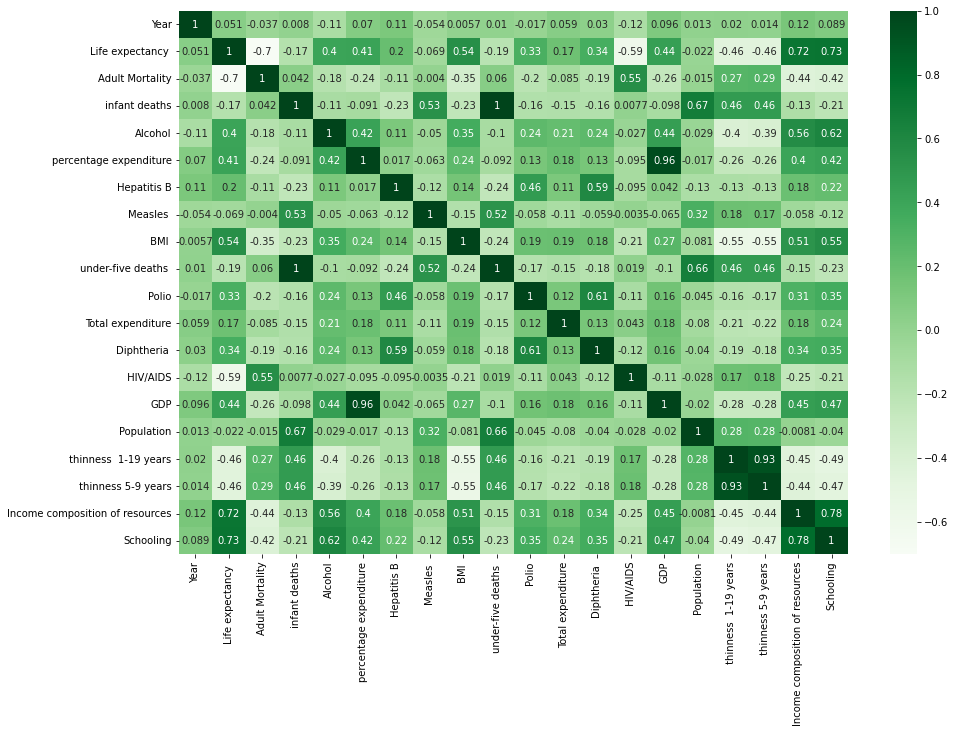

In [10]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='Greens')
plt.show()

this metric is very helpful in understanding the relation between the features as high corelation implies highly related. we can see (infant_death,under-5 death), (GDP,percentage expenditure),(thinnes 1-19 years,thinness 5-9 years) these are some which have high correlation.
this can also be seen intuitatively as in each tuple the mentioned parameter are almost similar in nature.

In [11]:
fig=px.histogram(df,x='Life expectancy ',template='plotly_dark')
fig.show()

this shows that the average life expectancy is between 70 to 80 years

In [12]:
fig=px.violin(df,x='Life expectancy ',color='Status',template='plotly_dark')
fig.show()

we see that in developing nations the mortality is present below 70 years as well but in developed nation the mortality is zero below 50 in this dataset

In [13]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [14]:
from sklearn.feature_selection import RFECV
from sklearn.svm import SVR

In [15]:
# estimator = SVR(kernel="linear")
# selector = RFECV(estimator,step=5, scoring='accuracy', min_features_to_select = 10)

In [16]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


In [17]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [18]:
scaler = StandardScaler()
temp = df.drop(['Country','Status'],axis = 1)
scaler.fit(temp)
scaler_df = pd.DataFrame(scaler.transform(temp),columns = [ 'Year', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'])


In [19]:
scaler_df.head()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,1.751998,-0.489223,0.756629,0.243745,-1.122948,-0.356909,-0.555446,-0.106171,-0.963560,0.238134,-3.455955,0.958840,-0.887941,-0.312389,-0.434239,0.270913,2.685909,2.663654,-0.833462,-0.722799
1,1.507289,-1.069152,0.820490,0.260300,-1.122948,-0.355633,-0.672648,-0.171828,-0.988878,0.256557,-1.139051,0.967541,-1.027006,-0.312389,-0.431760,-0.203382,2.751157,2.706643,-0.849853,-0.758583
2,1.262579,-1.069152,0.796542,0.276854,-1.122948,-0.355806,-0.594514,-0.177977,-1.014197,0.274979,-0.960828,0.945790,-0.934296,-0.312389,-0.430100,0.242452,2.794656,2.749632,-0.882634,-0.794367
3,1.017869,-1.114637,0.828472,0.301687,-1.122948,-0.352983,-0.477312,0.055789,-1.039516,0.299541,-0.738049,1.115452,-0.795231,-0.312389,-0.426769,-0.155548,2.838155,2.814116,-0.920878,-0.830151
4,0.773159,-1.148751,0.852420,0.318242,-1.122948,-0.393403,-0.438245,0.078203,-1.059771,0.324104,-0.693493,0.832682,-0.748876,-0.312389,-0.479628,-0.165747,2.903403,2.857105,-0.970049,-0.937503


In [20]:
# df_new = pd.DataFrame(scaler_df,columns = [ 'Year', 'Life expectancy ', 'Adult Mortality',
#        'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
#        'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
#        'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
#        ' thinness  1-19 years', ' thinness 5-9 years',
#        'Income composition of resources', 'Schooling'])

In [21]:
# df_new.head()

In [22]:
# selector = selector.fit(df[ft],df['Life expectancy '])
# selector.support_

In [23]:

le = LabelEncoder()
le.fit(df['Country'])
df['Country']=le.transform(df['Country'])

In [24]:
ge = LabelEncoder()
ge.fit(df['Status'])
df['Status'] = ge.transform(df['Status'])

In [25]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,2015,1,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0,2014,1,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0,2013,1,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0,2012,1,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0,2011,1,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [26]:
from sklearn.model_selection import train_test_split, cross_val_score
from statistics import mean
ft = [ 'Year', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling']
X_train, X_test, y_train, y_test = train_test_split(scaler_df[ft], scaler_df['Life expectancy '], test_size=0.30)


In [27]:
import statsmodels.api as sm
temp = df.drop(['Country','Status','Life expectancy '],axis = 1)
yknot = df['Life expectancy ']
result = sm.OLS(yknot,temp).fit()
print(result.summary())



                                 OLS Regression Results                                
Dep. Variable:       Life expectancy    R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                          3.239e+04
Date:                Mon, 22 Aug 2022   Prob (F-statistic):                        0.00
Time:                        00:08:44   Log-Likelihood:                         -4447.7
No. Observations:                1649   AIC:                                      8933.
Df Residuals:                    1630   BIC:                                      9036.
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------

In [28]:
#KS test
from scipy.stats import kstest
col = [ 'Year', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling']
for i in col:
    if i not in ['Country','Status']:
        test = kstest(scaler_df[i].to_list(),'norm')
        print(i," ",test)

Year   KstestResult(statistic=0.0968412612327717, pvalue=6.518177426704756e-14)
Adult Mortality   KstestResult(statistic=0.09887454613552715, pvalue=1.7425514060498855e-14)
infant deaths   KstestResult(statistic=0.3937895994074244, pvalue=5.509157407808413e-231)
Alcohol   KstestResult(statistic=0.1307298811785902, pvalue=4.943009735472367e-25)
percentage expenditure   KstestResult(statistic=0.3455220386594843, pvalue=2.363740131499903e-176)
Hepatitis B   KstestResult(statistic=0.21980871365346166, pvalue=1.9063230090232616e-70)
Measles    KstestResult(statistic=0.41269264241693676, pvalue=1.2047421088128205e-254)
 BMI    KstestResult(statistic=0.11684250698654441, pvalue=4.527972738612601e-20)
under-five deaths    KstestResult(statistic=0.39298733824574555, pvalue=5.205664618071042e-230)
Polio   KstestResult(statistic=0.2458089452130079, pvalue=3.1389461536854585e-88)
Total expenditure   KstestResult(statistic=0.03278195463821354, pvalue=0.056510891352609005)
Diphtheria    KstestResult

In [29]:
fig=px.histogram(df,x='Total expenditure',template='plotly_dark')
fig.show()

In [31]:
fig=px.histogram(df,x='Schooling',template='plotly_dark')
fig.show()

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso

In [29]:
linearModel = LinearRegression()
linearModel.fit(X_train, y_train)
 
# Evaluating the Linear Regression model
print(linearModel.score(X_test, y_test))

0.8166331533006799


In [30]:
#cross validation for lasso regression
cross_val_scores_lasso = []
Lambda = []
 

for i in range(1, 9):
    lassoModel = Lasso(alpha = i * 0.25, tol = 0.0925)
    lassoModel.fit(X_train, y_train)
    scores = cross_val_score(lassoModel,scaler_df[ft] ,scaler_df['Life expectancy '], cv = 10)
    avg_cross_val_score = mean(scores)*100
    cross_val_scores_lasso.append(avg_cross_val_score)
    Lambda.append(i * 0.25)

for i in range(0, len(Lambda)):
    print(str(Lambda[i])+' : '+str(cross_val_scores_lasso[i]))

0.25 : 65.22060848674958
0.5 : 32.03271607901974
0.75 : -8.042384021194692
1.0 : -8.149687643573019
1.25 : -8.149687643573019
1.5 : -8.149687643573019
1.75 : -8.149687643573019
2.0 : -8.149687643573019


In [31]:
#from above we conclude that the best one is for 2
lassoModelChosen = Lasso(alpha = 2, tol = 0.0925)
lassoModelChosen.fit(X_train, y_train)
scores = cross_val_score(lassoModel,df[ft] ,df['Life expectancy '], cv = 10)
avg_score = mean(scores)*100
print(avg_score)



76.3903109024792


c:\Users\siddh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.437e+04, tolerance: 9.992e+03

c:\Users\siddh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.369e+04, tolerance: 1.078e+04

c:\Users\siddh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.418e+04, to

we can see that we are getting almost same score in both the regressors

In [32]:
from sklearn.linear_model import Ridge
cross_val_scores_ridge = []
 
alpha = []
 

for i in range(1, 9):
    ridgeModel = Ridge(alpha = i * 0.25)
    ridgeModel.fit(X_train, y_train)
    scores = cross_val_score(ridgeModel,df[ft] ,df['Life expectancy '], cv = 10)
    avg_cross_val_score = mean(scores)*100
    cross_val_scores_ridge.append(avg_cross_val_score)
    alpha.append(i * 0.25)
 

for i in range(0, len(alpha)):
    print(str(alpha[i])+' : '+str(cross_val_scores_ridge[i]))

c:\Users\siddh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_ridge.py:156: LinAlgWarning:

Ill-conditioned matrix (rcond=2.07861e-18): result may not be accurate.

c:\Users\siddh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_ridge.py:156: LinAlgWarning:

Ill-conditioned matrix (rcond=1.78324e-18): result may not be accurate.

c:\Users\siddh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_ridge.py:156: LinAlgWarning:

Ill-conditioned matrix (rcond=2.02003e-18): result may not be accurate.

c:\Users\siddh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_ridge.py:156: LinAlgWarning:

Ill-conditioned matrix (rcond=2.10593e-18): result may not be accurate.

c:\Users\siddh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_ridge.py:156: LinAlgWarning:

Ill-conditioned matrix (rcond=1.62501e-17): result may not be accurate.

c:\Users\siddh\

0.25 : 78.45240801569177
0.5 : 78.45816625277523
0.75 : 78.46253574436933
1.0 : 78.46564035404099
1.25 : 78.46759250209276
1.5 : 78.46849434288859
1.75 : 78.46843880656947
2.0 : 78.46751052254784


c:\Users\siddh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_ridge.py:156: LinAlgWarning:

Ill-conditioned matrix (rcond=2.28225e-18): result may not be accurate.

c:\Users\siddh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_ridge.py:156: LinAlgWarning:

Ill-conditioned matrix (rcond=1.7788e-17): result may not be accurate.

c:\Users\siddh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_ridge.py:156: LinAlgWarning:

Ill-conditioned matrix (rcond=1.88916e-18): result may not be accurate.

c:\Users\siddh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_ridge.py:156: LinAlgWarning:

Ill-conditioned matrix (rcond=2.32116e-18): result may not be accurate.

c:\Users\siddh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_ridge.py:156: LinAlgWarning:

Ill-conditioned matrix (rcond=2.32122e-18): result may not be accurate.

c:\Users\siddh\A

In [33]:
ridgeModelChosen = Ridge(alpha = 2)
ridgeModelChosen.fit(X_train, y_train)
 
# Evaluating the Ridge Regression model
print(ridgeModelChosen.score(X_test, y_test))

0.8154330726611927


self implementation cross validation for linear regression

In [34]:
def cross(traink,k=5):
  
  ft_columns = [ 'Year','Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling']
  train = traink[ft_columns]
  ret = np.array_split(train,k)
  weights = []
  for i in range(k):
    ret[i] = pd.DataFrame(ret[i],columns=ft_columns)
  
  for i in range(k):
    print(i)
    great = ret[i]
    
    X_test = great.drop('Life expectancy ',axis =1)
    y_test = great['Life expectancy ']
    oops = pd.DataFrame(columns = ft_columns)
    for j in range(k):
      if j!=i:
        oops = oops.append(ret[j], ignore_index=True)
    X_train = oops
    y_train = X_train['Life expectancy ']
    X_train = X_train.drop("Life expectancy ",axis =1)

    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    #weights.append(linreg.fit(X_train, y_train))
    y_pred = linreg.predict(X_test)
    print(linreg.score(X_test,y_test))
    count = 0
    su = 0.0
    mse = mean_squared_error(y_test,y_pred,squared = False)
    print("RMSE linreg:",mse)

In [35]:
cross(scaler_df,5)

0
0.83577060314275
RMSE linreg: 0.43194569323329185
1
0.7725073708509681
RMSE linreg: 0.4380070084172396
2
0.842991969771948
RMSE linreg: 0.42267991028902796
3
0.7139205382778535
RMSE linreg: 0.44168281829940653
4
0.7925828440419074
RMSE linreg: 0.4781369574063617


we can see that the third one give  the highiest accuracy


In [36]:
from sklearn.model_selection import train_test_split, cross_val_score
from statistics import mean

X_train, X_test, y_train, y_test = train_test_split(scaler_df, scaler_df['Life expectancy '], test_size=0.30)

In [37]:
A = X_train.to_numpy()
t = np.dot(np.dot(np.linalg.inv(np.dot(A.transpose(),A)),A.transpose()),y_train)

A_test = X_test.to_numpy()
y_cap = np.dot(t,np.transpose(A_test))

In [38]:
mse = mean_squared_error(y_test,y_cap,squared = False)
print("RMSE pseudo inv:",mse)

RMSE pseudo inv: 6.339502808926198e-15


In [39]:
def merge(x,y):
    x['Life expectancy'] = y
    return x

In [40]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([('svc',StandardScaler()),('kross',cross(scaler_df))])
pipe.fit(X_train,y_train)

0
0.83577060314275
RMSE linreg: 0.43194569323329185
1
0.7725073708509681
RMSE linreg: 0.4380070084172396
2
0.842991969771948
RMSE linreg: 0.42267991028902796
3
0.7139205382778535
RMSE linreg: 0.44168281829940653
4
0.7925828440419074
RMSE linreg: 0.4781369574063617


Pipeline(steps=[('svc', StandardScaler()), ('kross', None)])